## Contents
- Header Documentation
- Problem statement
- Python Code
- Machine Learning Prediction & Outcomes
- Visualization
- Trailer Documentation


# Header Document 

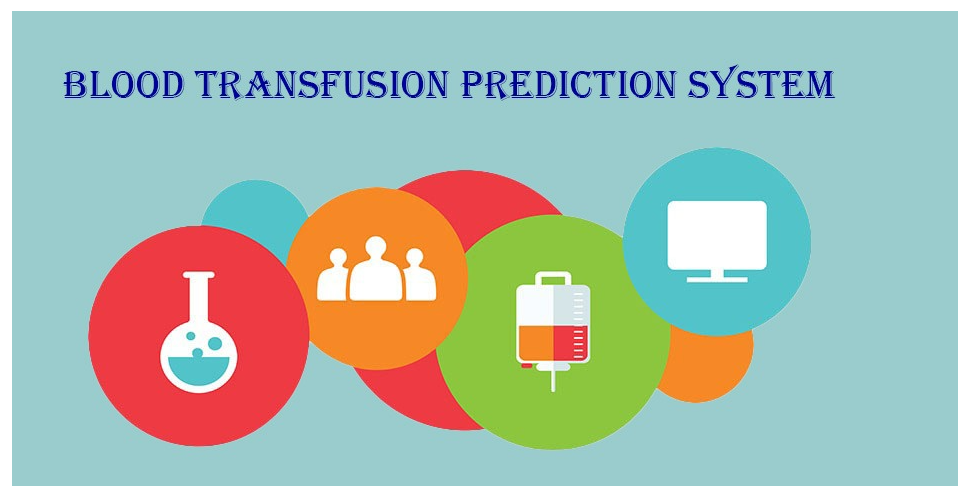


- Here we have developed a model using TPOT where we had taken the dataset and predicted quantity of blood that might be collected if we organized the blood camp in that area/city.

- We had text data where we have different parameters such as 'last month of donation','Frequency','Monetory' and many more. Initially using this data we have tried different ML algorithmn such as Decission Tree, SVM  and logistic Regression tried to predict using these models. After that we took TPOT and analyze which algorithmn is automatically chosen with respect to this datset. 

- These will help the organizer to decide which area should be selected for organizing donation camp in order to get desired quantity of blood.

- Our project scopes includes healthcare systems, hospitals and Organizations


# Problem Statement

Blood transfusions in the medical industry have proved to be a manual process. We believe it is more important to intelligently automate the blood transfusion supply chain as all critical conditions can require blood at the earliest. Blood banks and health agencies can organize blood donations more efficiently if they can predict how many people will donate blood based on previous blood donations in blood camps. The goal of this group project is to anticipate who will donate blood in upcoming blood donation camps and during the urgent need. To achieve this goal, we are planning to analyze the person's blood donation history and predict the likelihood that the person will donate blood in the future or not. We will use the dataset that is readily available on the web. After studying the dataset, we will train the model using multiple machine learning algorithms, optimize different hyperparameters, evaluate the models' results, and compare the accuracy of each to choose the best.

# Python Code

## 1. Inspecting transfusion.data file
<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="A pictogram of a blood bag with blood donation written in it" width="200"></p>
<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>
<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>
<p>The data is stored in <code>datasets/transfusion.data</code> and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.</p>

## 2. Loading the blood donations data
<p>We now know that we are working with a typical CSV file (i.e., the delimiter is <code>,</code>, etc.). We proceed to loading the data into memory.</p>

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
transfusion = pd.read_csv('C:/Users/User/Documents/AIDI_SEM-2/Emerging AI TEchnologies-Jahanzeb Abbas (JB)/Presentation 2/Project/Project/Dataset/transfusion_data.csv',index_col='Sr.no')

transfusion

,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,whether he/she donated blood in March 2007,Location,Location_Name
Sr.no,,,,,,,,,
1,Oluwatobiloba Goulding,2,50,12500,98,2007,1,1,Kitchner Hospital
2,Gianluca Herring,0,13,3250,28,2007,1,1,Kitchner Hospital
3,Antonia Almond,1,16,4000,35,2007,1,1,Kitchner Hospital
4,Sally Sloan,2,20,5000,45,2007,1,3,Victoria Hospital
5,Kelis Hirst,1,24,6000,77,2007,0,2,Civik Hospital
6,Anne Summers,4,4,1000,4,2007,0,2,Civik Hospital
7,Ainsley Reeve,2,7,1750,14,2007,1,3,Victoria Hospital
8,Mahir Quintana,1,12,3000,35,2007,0,3,Victoria Hospital
9,Zishan Castaneda,2,9,2250,22,2007,1,3,Victoria Hospital


In [ ]:
len(transfusion[transfusion['whether he/she donated blood in March 2007']==0]),len(transfusion[transfusion['whether he/she donated blood in March 2007']==1])

(570, 178)

## 3. Inspecting transfusion DataFrame
<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.</p>
<p>RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:</p>
<ul>
<li>R (Recency - months since the last donation)</li>
<li>F (Frequency - total number of donation)</li>
<li>M (Monetary - total blood donated in c.c.)</li>
<li>T (Time - months since the first donation)</li>
<li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
<p>It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [ ]:

transfusion.info()
print('-' * 100)
transfusion.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 1 to 748
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Name                                        748 non-null    object
 1   Recency (months)                            748 non-null    int64 
 2   Frequency (times)                           748 non-null    int64 
 3   Monetary (c.c. blood)                       748 non-null    int64 
 4   Time (months)                               748 non-null    int64 
 5   Year                                        748 non-null    int64 
 6   whether he/she donated blood in March 2007  748 non-null    int64 
 7   Location                                    748 non-null    int64 
 8   Location_Name                               748 non-null    object
dtypes: int64(7), object(2)
memory usage: 58.4+ KB
-----------------------------------------------------

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,whether he/she donated blood in March 2007,Location
count,748.000000,748.000000,748.000000,748.000000,748.0,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,2007.0,0.237968,2.046791
std,8.095396,5.839307,1459.826781,24.376714,0.0,0.426124,0.807729
min,0.000000,1.000000,250.000000,2.000000,2007.0,0.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,2007.0,0.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,2007.0,0.000000,2.000000
75%,14.000000,7.000000,1750.000000,50.000000,2007.0,0.000000,3.000000
max,74.000000,50.000000,12500.000000,98.000000,2007.0,1.000000,3.000000


## 4. Creating target column
<p>We are aiming to predict the value in <code>whether he/she donated blood in March 2007</code> column. Let's rename this it to <code>target</code> so that it's more convenient to work with.</p>

In [ ]:
transfusion.rename(
    columns = {'whether he/she donated blood in March 2007': 'target'},
    inplace = True
)

transfusion.head(2)

,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,target,Location,Location_Name
Sr.no,,,,,,,,,
1,Oluwatobiloba Goulding,2,50,12500,98,2007,1,1,Kitchner Hospital
2,Gianluca Herring,0,13,3250,28,2007,1,1,Kitchner Hospital


## 5. Checking target incidence
<p>We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>
<ul>
<li><code>0</code> - the donor will not give blood</li>
<li><code>1</code> - the donor will give blood</li>
</ul>
<p>Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.</p>

In [ ]:
print('Target incidence proportions:\n')
print(round(transfusion.target.value_counts(normalize = True) * 100,3))

Target incidence proportions:

0    76.203
1    23.797
Name: target, dtype: float64


In [ ]:
transfusion

,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,target,Location,Location_Name
Sr.no,,,,,,,,,
1,Oluwatobiloba Goulding,2,50,12500,98,2007,1,1,Kitchner Hospital
2,Gianluca Herring,0,13,3250,28,2007,1,1,Kitchner Hospital
3,Antonia Almond,1,16,4000,35,2007,1,1,Kitchner Hospital
4,Sally Sloan,2,20,5000,45,2007,1,3,Victoria Hospital
5,Kelis Hirst,1,24,6000,77,2007,0,2,Civik Hospital
6,Anne Summers,4,4,1000,4,2007,0,2,Civik Hospital
7,Ainsley Reeve,2,7,1750,14,2007,1,3,Victoria Hospital
8,Mahir Quintana,1,12,3000,35,2007,0,3,Victoria Hospital
9,Zishan Castaneda,2,9,2250,22,2007,1,3,Victoria Hospital


In [ ]:
transfusion.columns

Index(['Name', 'Recency (months)', 'Frequency (times)',
       'Monetary (c.c. blood)', 'Time (months)', 'Year', 'target', 'Location',
       'Location_Name'],
      dtype='object')

## 6. Splitting transfusion into train and test datasets
<p>We'll now use <code>train_test_split()</code> method to split <code>transfusion</code> DataFrame.</p>
<p>Target incidence informed us that in our dataset <code>0</code>s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the <code>train_test_split()</code> method from the <code>scikit learn</code> library - all we need to do is specify the <code>stratify</code> parameter. In our case, we'll stratify on the <code>target</code> column.</p>

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    transfusion[['Recency (months)', 'Frequency (times)',
       'Monetary (c.c. blood)', 'Time (months)', 
       'target']].iloc[:,:-1],
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

print('First two rows of X_train: ')
X_train.head(2)

First two rows of X_train: 


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
Sr.no,,,,
335,16,2,500,16
100,5,7,1750,26


In [ ]:
transfusion_temp=transfusion.copy()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = transfusion[(transfusion['target']==0)] 
df_minority = transfusion[(transfusion['target']==1)] 

In [ ]:
df_majority

,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,target,Location,Location_Name
Sr.no,,,,,,,,,
5,Kelis Hirst,1,24,6000,77,2007,0,2,Civik Hospital
6,Anne Summers,4,4,1000,4,2007,0,2,Civik Hospital
8,Mahir Quintana,1,12,3000,35,2007,0,3,Victoria Hospital
11,Amirah Castaneda,4,23,5750,58,2007,0,3,Victoria Hospital
12,Hailie Lowry,0,3,750,4,2007,0,1,Kitchner Hospital
14,Elaina Sinclair,1,13,3250,47,2007,0,3,Victoria Hospital
22,Amirah Quintana,4,11,2750,28,2007,0,2,Civik Hospital
25,Allen Boone,9,9,2250,16,2007,0,1,Kitchner Hospital
26,Emaan Montoya,4,14,3500,40,2007,0,2,Civik Hospital


In [ ]:
df_minority

,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,target,Location,Location_Name
Sr.no,,,,,,,,,
1,Oluwatobiloba Goulding,2,50,12500,98,2007,1,1,Kitchner Hospital
2,Gianluca Herring,0,13,3250,28,2007,1,1,Kitchner Hospital
3,Antonia Almond,1,16,4000,35,2007,1,1,Kitchner Hospital
4,Sally Sloan,2,20,5000,45,2007,1,3,Victoria Hospital
7,Ainsley Reeve,2,7,1750,14,2007,1,3,Victoria Hospital
9,Zishan Castaneda,2,9,2250,22,2007,1,3,Victoria Hospital
10,Zack Oakley,5,46,11500,98,2007,1,2,Civik Hospital
13,Yolanda Byrd,2,10,2500,28,2007,1,2,Civik Hospital
15,Ruqayyah Boone,2,6,1500,15,2007,1,2,Civik Hospital


In [ ]:
#Over sampling
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(transfusion[['Recency (months)', 'Frequency (times)',
       'Monetary (c.c. blood)', 'Time (months)', 
       'target']].drop('target', axis=1), transfusion['target'])
oversampled = pd.concat([ pd.DataFrame(oversampled_X),pd.DataFrame(oversampled_Y)], axis=1)

In [ ]:
oversampled

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [ ]:
transfusion=oversampled.copy()
len(transfusion[transfusion['target']==0]),len(transfusion[transfusion['target']==1])

(570, 570)

In [ ]:
transfusion_temp

,Name,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,target,Location,Location_Name
Sr.no,,,,,,,,,
1,Oluwatobiloba Goulding,2,50,12500,98,2007,1,1,Kitchner Hospital
2,Gianluca Herring,0,13,3250,28,2007,1,1,Kitchner Hospital
3,Antonia Almond,1,16,4000,35,2007,1,1,Kitchner Hospital
4,Sally Sloan,2,20,5000,45,2007,1,3,Victoria Hospital
5,Kelis Hirst,1,24,6000,77,2007,0,2,Civik Hospital
6,Anne Summers,4,4,1000,4,2007,0,2,Civik Hospital
7,Ainsley Reeve,2,7,1750,14,2007,1,3,Victoria Hospital
8,Mahir Quintana,1,12,3000,35,2007,0,3,Victoria Hospital
9,Zishan Castaneda,2,9,2250,22,2007,1,3,Victoria Hospital


## 7. Selecting model using TPOT
<p><a href="https://github.com/EpistasisLab/tpot">TPOT</a> is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.</p>
<p><img src="https://assets.datacamp.com/production/project_646/img/tpot-ml-pipeline.png" alt="TPOT Machine Learning Pipeline"></p>
<p>TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">scikit-learn pipeline</a>, meaning it will include any pre-processing steps as well as the model.</p>
<p>We are using TPOT to help us zero in on one model that we can then explore and optimize further.</p>

In [ ]:
!pip install tpot

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
transfusion

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    transfusion.iloc[:,:-1],
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

print('First two rows of X_train: ')
X_train.head(2)

First two rows of X_train: 


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
226,4,1,250,4
65,3,16,4000,74


In [ ]:

from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

tpot = TPOTClassifier(
    generations=10,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7985225718194254

Generation 2 - Current best internal CV score: 0.7985225718194254

Generation 3 - Current best internal CV score: 0.8058549931600547

Generation 4 - Current best internal CV score: 0.8079480164158687

Generation 5 - Current best internal CV score: 0.8079480164158687

Generation 6 - Current best internal CV score: 0.8079480164158687

Generation 7 - Current best internal CV score: 0.8095896032831738

Generation 8 - Current best internal CV score: 0.8095896032831738

Generation 9 - Current best internal CV score: 0.8129411764705882

Generation 10 - Current best internal CV score: 0.8129411764705882

Best pipeline: DecisionTreeClassifier(DecisionTreeClassifier(VarianceThreshold(input_matrix, threshold=0.2), criterion=entropy, max_depth=4, min_samples_leaf=16, min_samples_split=15), criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=12)

AUC score: 0.8036

Best pipeline steps:
1. VarianceThreshold(thresho

# Prediction on new Data

In [ ]:
transfusion_temp=pd.read_csv("C:/Users/User/Documents/AIDI_SEM-2/Emerging AI TEchnologies-Jahanzeb Abbas (JB)/Presentation 2/Project/Project/Dataset/April_2007_raw_data.csv")


In [ ]:
transfusion_temp

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,Location,Location_Name
0,2,20,5000,45,2007,3,Victoria Hospital
1,2,7,1750,14,2007,3,Victoria Hospital
2,1,12,3000,35,2007,3,Victoria Hospital
3,2,9,2250,22,2007,3,Victoria Hospital
4,4,23,5750,58,2007,3,Victoria Hospital
5,1,13,3250,47,2007,3,Victoria Hospital
6,2,6,1500,16,2007,3,Victoria Hospital
7,4,8,2000,21,2007,3,Victoria Hospital
8,4,10,2500,28,2007,3,Victoria Hospital
9,4,9,2250,26,2007,3,Victoria Hospital


In [ ]:
import numpy as np
o_p=[]
for i in range(1,len(transfusion_temp)+1):
#     print(np.argmax(tpot.predict_proba(transfusion.iloc[i-1:i,:-1])))
    o_p.append(np.argmax(tpot.predict_proba(transfusion_temp[['Recency (months)', 'Frequency (times)',
       'Monetary (c.c. blood)', 'Time (months)']].iloc[i-1:i,:])))
    

In [ ]:
o_p_data=pd.DataFrame(o_p,columns=['Prediction'])


In [ ]:
DATA_1=pd.concat([transfusion_temp,o_p_data],axis=1)
DATA_1

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Year,Location,Location_Name,Prediction
0,2,20,5000,45,2007,3,Victoria Hospital,1
1,2,7,1750,14,2007,3,Victoria Hospital,1
2,1,12,3000,35,2007,3,Victoria Hospital,1
3,2,9,2250,22,2007,3,Victoria Hospital,0
4,4,23,5750,58,2007,3,Victoria Hospital,1
5,1,13,3250,47,2007,3,Victoria Hospital,1
6,2,6,1500,16,2007,3,Victoria Hospital,1
7,4,8,2000,21,2007,3,Victoria Hospital,1
8,4,10,2500,28,2007,3,Victoria Hospital,1
9,4,9,2250,26,2007,3,Victoria Hospital,1


In [ ]:
DATA_1.to_csv("Prediction.csv")

## 8. Checking the variance
<p>TPOT picked <code>LogisticRegression</code> as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.7850. This is a great starting point. Let's see if we can make it better.</p>
<p>One of the assumptions for linear regression models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.</p>
<p>Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.</p>

In [ ]:
round(X_train.var(),3)

Recency (months)              54.807
Frequency (times)             46.862
Monetary (c.c. blood)    2971968.008
Time (months)                581.227
dtype: float64

## 9. Log normalization
<p><code>Monetary (c.c. blood)</code>'s variance is very high in comparison to any other column in the dataset. This means that, unless accounted for, this feature may get more weight by the model (i.e., be seen as more important) than any other feature.</p>
<p>One way to correct for high variance is to use log normalization.</p>

In [ ]:
import numpy as np

X_train_normed, X_test_normed= X_train.copy(), X_test.copy()

col_to_normalize = 'Monetary (c.c. blood)'

for df_ in [X_train_normed, X_test_normed]:
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    df_.drop(columns = col_to_normalize, inplace=True)

round(X_train_normed.var(),3)

Recency (months)      54.807
Frequency (times)     46.862
Time (months)        581.227
monetary_log           0.862
dtype: float64

## 10. Training the linear regression model
<p>The variance looks much better now. Notice that now <code>Time (months)</code> has the largest variance, but it's not the <a href="https://en.wikipedia.org/wiki/Order_of_magnitude">orders of magnitude</a> higher than the rest of the variables, so we'll leave it as is.</p>
<p>We are now ready to train the linear regression model.</p>

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_normed, y_train)

logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7747


## 11. Conclusion
<p>The demand for blood fluctuates throughout the year. As one <a href="https://www.kjrh.com/news/local-news/red-cross-in-blood-donation-crisis">prominent</a> example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.</p>
<p>In this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7850. This is better than simply choosing <code>0</code> all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by 0.5%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.</p>
<p>Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (<code>target</code>) can be explained by other variables in our dataset.</p>

In [ ]:
from operator import itemgetter

sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key = itemgetter(1),
    reverse = True
)

[('tpot', 0.8035802225943071), ('logreg', 0.7747463803801832)]

# Visualization



## - Architecture

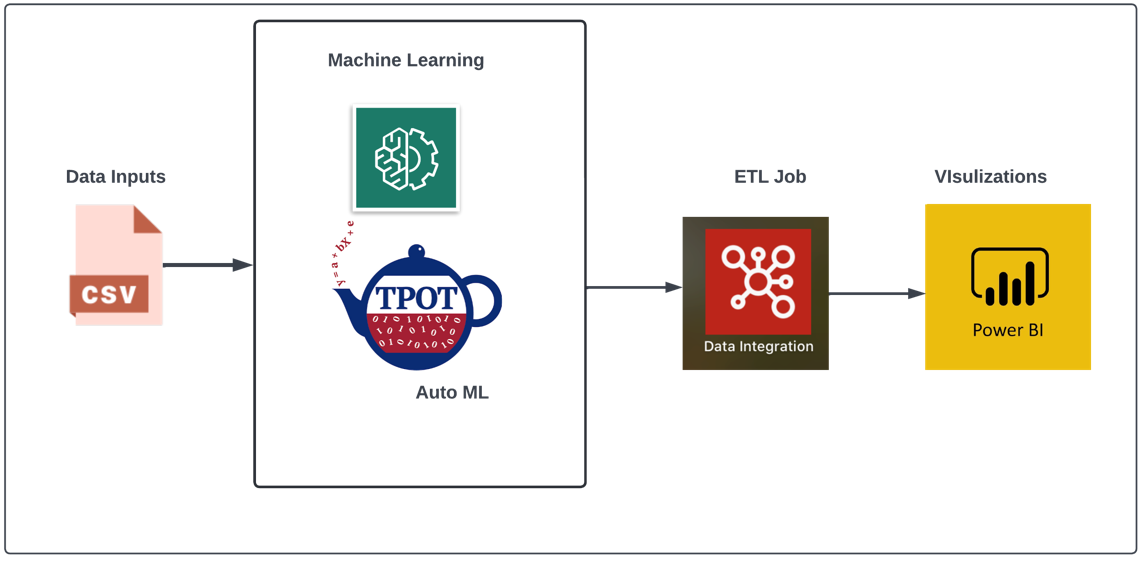

## - Dashboard

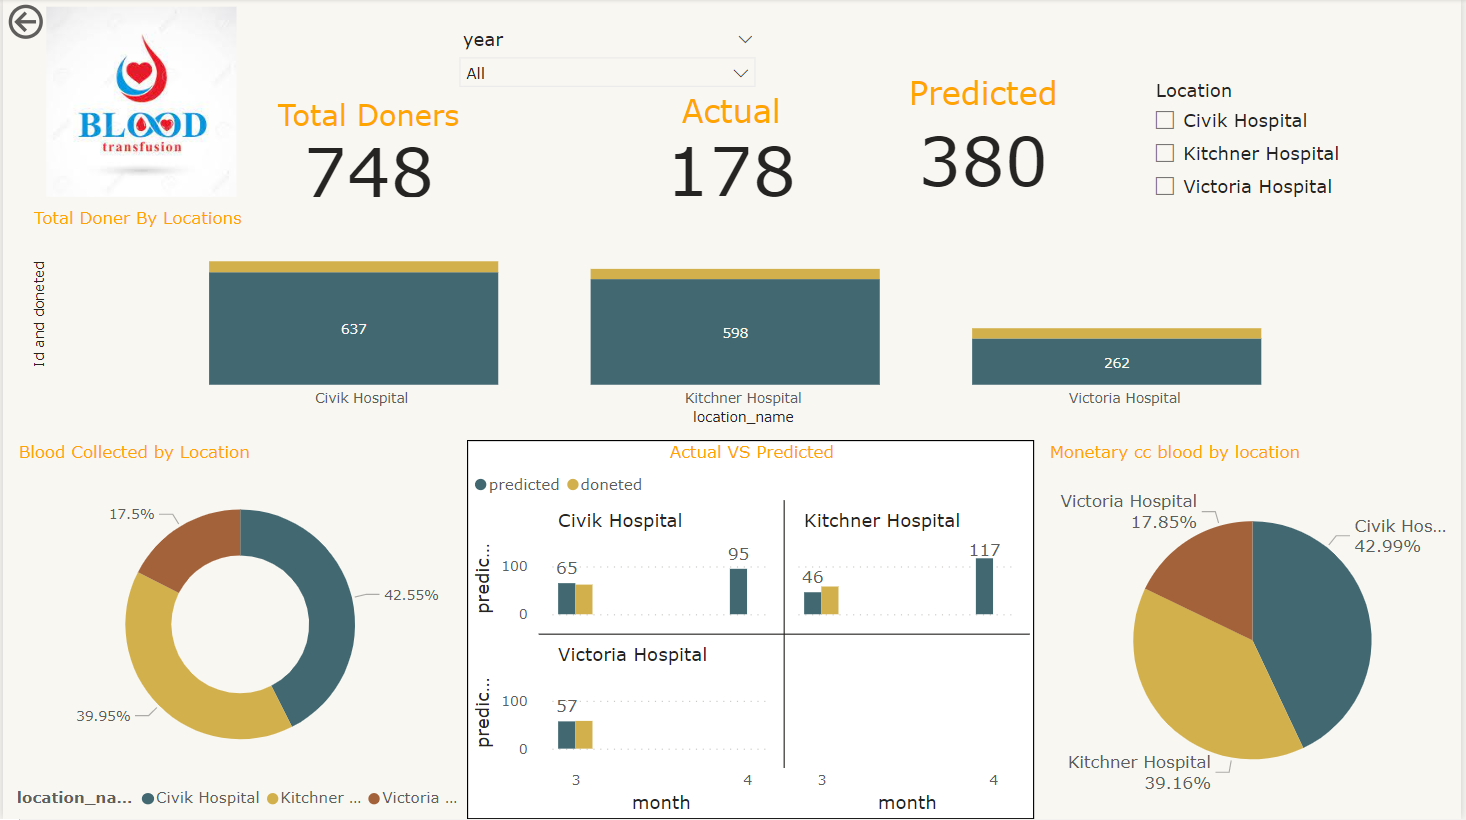

## - Drill Down VIsualization with Prediction

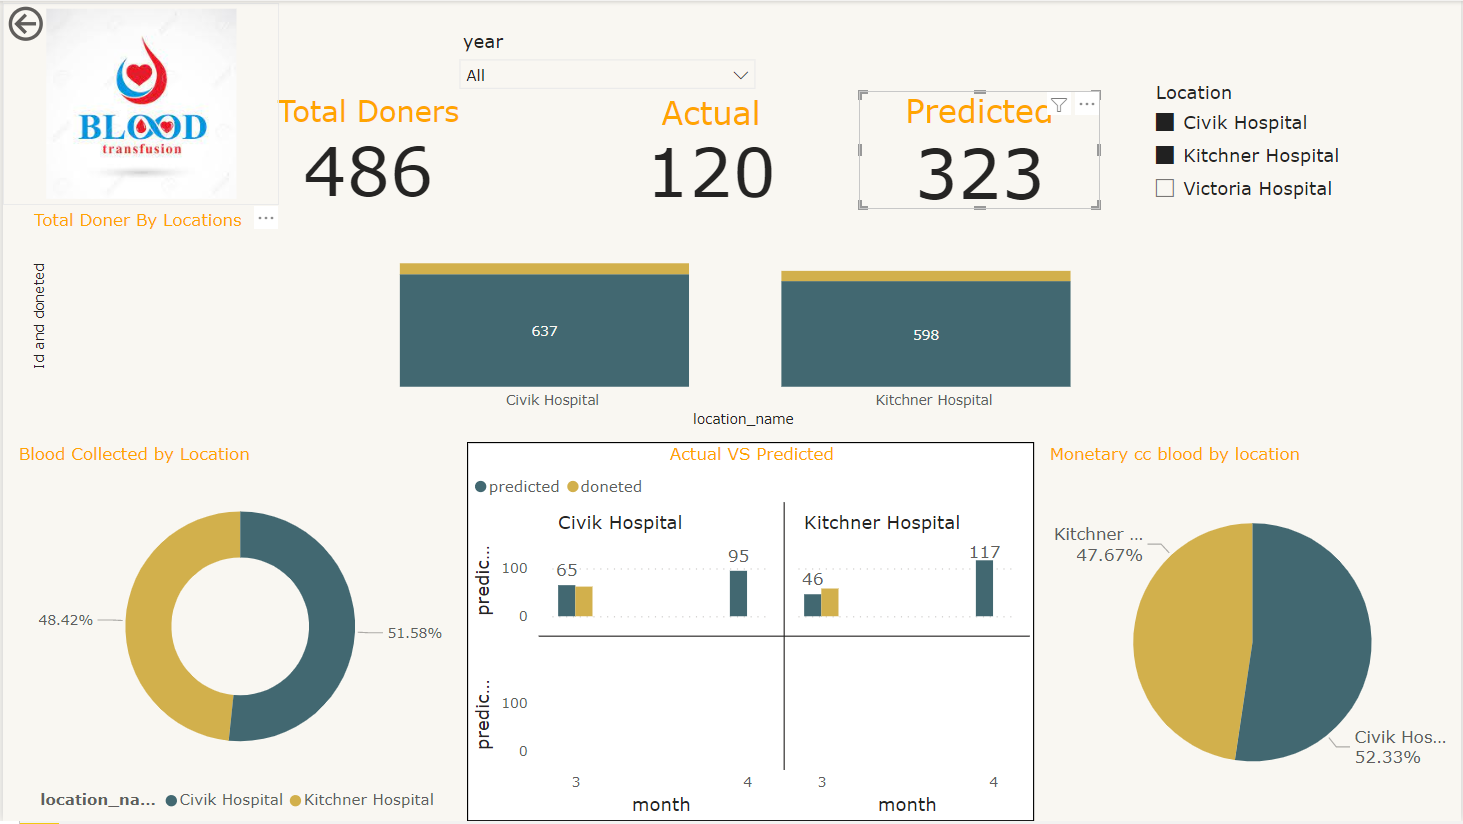

## - Data Pipeline


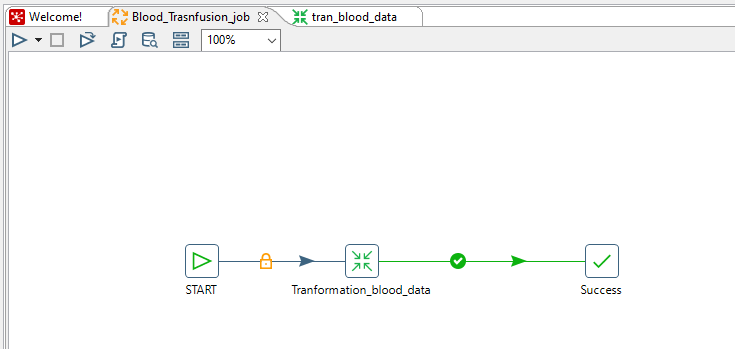

# Trailer Documentation 
#### What did you learn, how else would you improve the code or visualization? Final remarks from each group member

- We can do more hyperparameter tuning which will help in improvising the accuracy of teh model
- Here we get to learn how to create end to end pipline of the project
- We have also advanced out knowledge in Power BI tool as we have used it for visualization
- In our visualization we have only compare 2-3 columns from the dataset.If we do more visualization on the column and  compare each and every column and parameter it will belp to make accurate predication like which area should be selected to set you an boold donation camp.
- The dataset which we have used was very small and we had very less number of parameters. if we get actual dataset then it would create more impact on the model and the prediction.


# References

- Kaggle. (2020, November 9). Working With TPOT. Kaggle. Retrieved April 21, 2022, from https://www.kaggle.com/code/tug004/predicting-blood-transfusion-with-tpot-0-78-auc/data 

- Adalberth G, Byström S, Kolstad K, Mallmin H, Milbrink J (1998) Postoperative drainage of knee arthroplasty is not necessary: a randomized study of 90 patients. Acta Orthop Scand 69:475–478

- Bell TH, Berta D, Ralley F, Macdonald SJ, McCalden RW, Bourne RB et al (2009) Factors affecting perioperative blood loss and transfusion rates in primary total joint arthroplasty: a prospective analysis of 1642 patients. Can J Surg 52:295–301